<h1> Breast Cancer</h1>
<ul>
    <li> Import Packages
    <li> Explore Dataset
    <li> Preprocessing
    <li> Split Dataset
    <li> Modeling

# Import Packages

In [17]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# Explore Dataset

In [4]:
df = pd.read_csv('data.csv')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [6]:
df.shape

(569, 33)

In [8]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Rename Dataset Label
df = df.rename(columns = {'diagnosis' : 'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

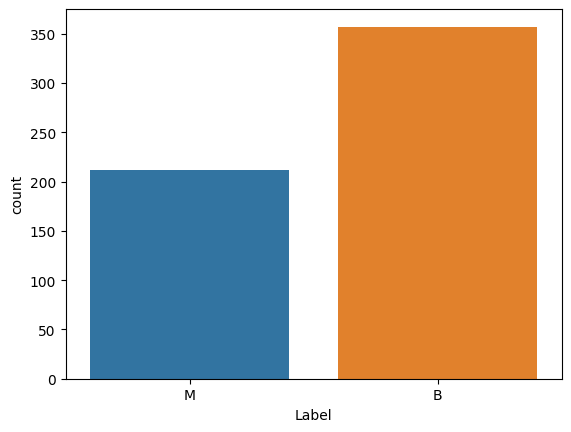

In [13]:
# Understand The data
sns.countplot(x=  'Label' , data = df)
plt.show()

# Preprocessing

In [15]:
print("Distribution of the data: " , df['Label'].value_counts())

Distribution of the data:  B    357
M    212
Name: Label, dtype: int64


In [19]:
y = df['Label'].values
print("Labels before encoding are: " , np.unique(y))

Labels before encoding are:  ['B' 'M']


In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y)
print("Labels after encoding are: " , np.unique(Y))

Labels after encoding are:  [0 1]


In [29]:
# Define x and normalize/ scale values

# Drop 'Label' , 'id' , 'Unnamed: 32' columns 
X = df.drop(labels = ['Label' , 'id' , 'Unnamed: 32'] , axis = 1)
print(X.shape)
print(X.describe().T) # Needs scaling

(569, 30)
                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se   

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

print(f"\nMinimum values is: {np.min(X)} , Maximum value is: {np.max(X)}")

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]

Minimum values is: 0.0 , Maximum value is: 1.0


# Split Dataset

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 42)
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of test data: {X_test.shape}")

Shape of training data: (426, 30)
Shape of test data: (143, 30)


# Modeling

In [43]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout

In [45]:
model = Sequential()
model.add(Dense(16 , input_dim = 30 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [47]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
hist = model.fit(X_train ,y_train , verbose =1 , epochs = 100  , batch_size = 64 , validation_data=(X_test , y_test) )

Epoch 1/100
7/7 [==============================] - 2s 68ms/step - loss: 0.6775 - accuracy: 0.5845 - val_loss: 0.6620 - val_accuracy: 0.6783
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6650 - accuracy: 0.6643 - val_loss: 0.6485 - val_accuracy: 0.7832
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6560 - accuracy: 0.6831 - val_loss: 0.6345 - val_accuracy: 0.8182
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6381 - accuracy: 0.7512 - val_loss: 0.6205 - val_accuracy: 0.8531
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6258 - accuracy: 0.7840 - val_loss: 0.6066 - val_accuracy: 0.8392
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6153 - accuracy: 0.7981 - val_loss: 0.5937 - val_accuracy: 0.8601
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6065 - accuracy: 0.8192 - val_loss: 0.5812 - val_accuracy: 0.8741
Epoch 8/100
7/7 [=========

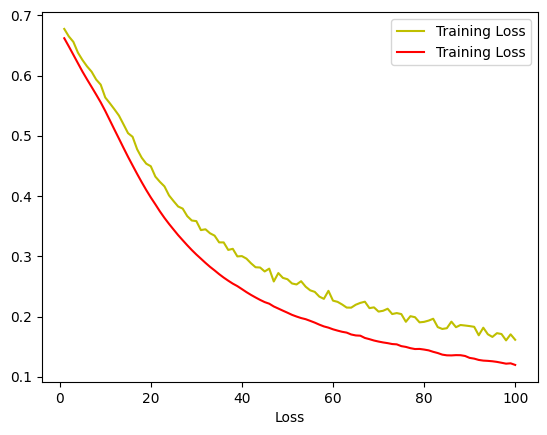

In [57]:
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1 , len(loss)+1)
plt.plot(epochs , loss , 'y' , label= 'Training Loss')
plt.plot(epochs , val , 'r' , label= 'Validation Loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

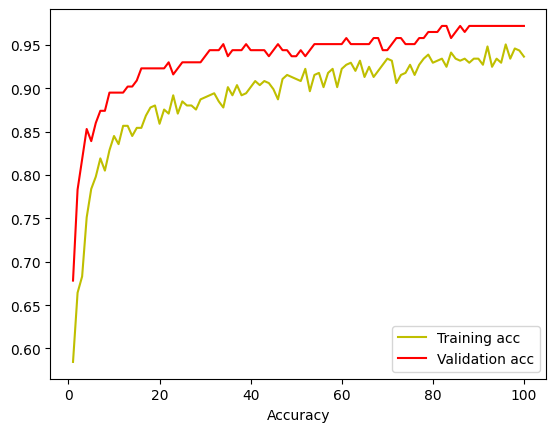

In [59]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1 , len(loss)+1)
plt.plot(epochs , acc , 'y' , label= 'Training acc' )
plt.plot(epochs , val_acc , 'r' , label= 'Validation acc')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

In [60]:
# Predictions 
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 2s 6ms/step


<AxesSubplot: >

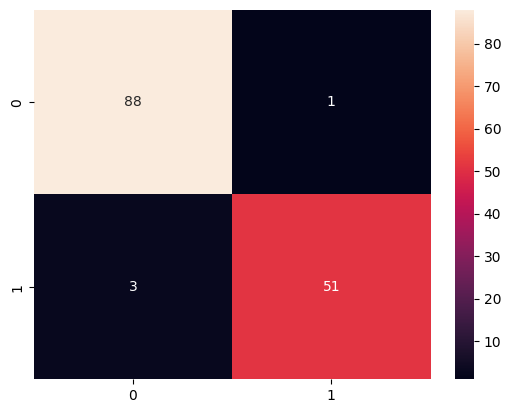

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm ,annot = True)